In [3]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-09-27 11:48:46--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-09-27 11:48:46 (44.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [7]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1]

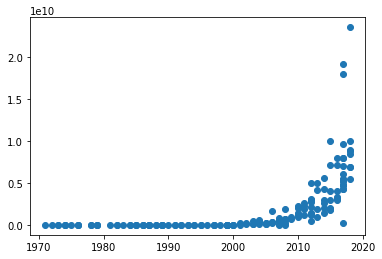

In [8]:
plt.scatter(X,Y)

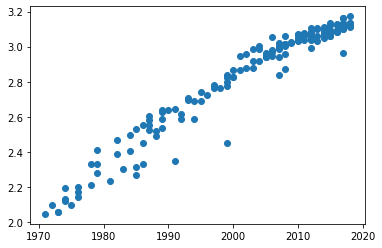

In [10]:
Y= np.log(Y)
plt.scatter(X, Y)

In [11]:
X = X - X.mean()

In [38]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')


# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
 

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 157.5354
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 163.1790
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 168.1688
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 153.8780
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 174.4469
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 103.0752
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 59.4500
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 31.4583
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 14.7431
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 4.4586
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 2.3896
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 1.4164
Epoch 13/200
6/6 [============================

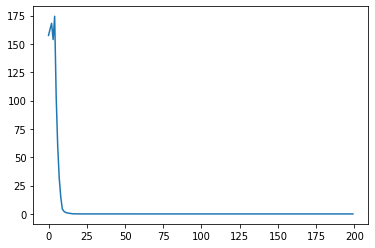

In [39]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [40]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.02204053]], dtype=float32), array([2.832775], dtype=float32)]


In [41]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.022040531


In [42]:
print("Time to double:", np.log(2) / a)

Time to double: 31.44875136293041


In [43]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.022438740069129746 2.832921808317504
Time to double: 30.890646196020043


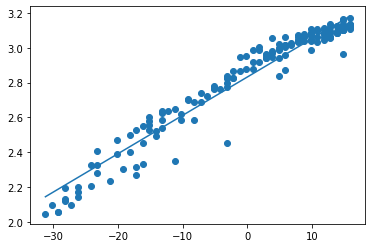

In [44]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [45]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True